In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
import pandas as pd
import numpy as np
data = pd.read_csv("/kaggle/input/data22/data.csv")
print("First five rows:")
print(data.head())
print("\nDataset Info:")
print(data.info())
print("\nMissing Values:")
print(data.isnull().sum())
print("\nColumn Data Types:")
print(data.dtypes)
if 'Unnamed: 32' in data.columns:
    print("\nUnique Values in Unnamed: 32:")
    print(data['Unnamed: 32'].unique())
data_cleaned = data.drop(columns=['Unnamed: 32'], errors='ignore')
data_cleaned = data_cleaned.apply(pd.to_numeric, errors='coerce')
data_cleaned.fillna(data_cleaned.mean(), inplace=True)
print("\nCleaned Data Overview:")
print(data_cleaned.info())
print("\nSummary Statistics:")
print(data_cleaned.describe())


First five rows:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

In [7]:
print("Column Names in Dataset:")
print(data_cleaned.columns)


Column Names in Dataset:
Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [8]:
X = data_cleaned.drop(columns=['diagnosis'])  
y = data_cleaned['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("\nShape of Training Data:", X_train_scaled.shape)
print("Shape of Testing Data:", X_test_scaled.shape)



Shape of Training Data: (455, 31)
Shape of Testing Data: (114, 31)


In [10]:
print("\nMissing values in target column:")
print(y_train.isnull().sum())
X_train_scaled = X_train_scaled[~y_train.isnull()]
y_train = y_train.dropna()
X_test_scaled = X_test_scaled[~y_test.isnull()]
y_test = y_test.dropna()
print("\nMissing values after cleanup:", y_train.isnull().sum())



Missing values in target column:
455

Missing values after cleanup: 0


In [12]:
print("\nShape of X_train_scaled:", X_train_scaled.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)
print("Shape of y_test:", y_test.shape)



Shape of X_train_scaled: (0, 31)
Shape of y_train: (0,)
Shape of X_test_scaled: (0, 31)
Shape of y_test: (0,)


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
data_cleaned = data.dropna(subset=['diagnosis'])
print("\nDataset shape after NaN removal:", data_cleaned.shape)
X = data_cleaned.drop(columns=['diagnosis'])
y = data_cleaned['diagnosis']
if X.shape[0] == 0 or y.shape[0] == 0:
    print("\nError: No valid samples found after filtering. Check the target column for missing values.")
else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    print("\nShape of X_train_scaled:", X_train_scaled.shape)
    print("Shape of y_train:", y_train.shape)
    print("Shape of X_test_scaled:", X_test_scaled.shape)
    print("Shape of y_test:", y_test.shape)



Dataset shape after NaN removal: (569, 33)

Shape of X_train_scaled: (455, 32)
Shape of y_train: (455,)
Shape of X_test_scaled: (114, 32)
Shape of y_test: (114,)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:87: RuntimeWarning: invalid value encountered in less_equal
  return var <= upper_bound


In [16]:
import numpy as np
print("\nChecking for NaNs in X_train_scaled:", np.isnan(X_train_scaled).sum())
print("Checking for NaNs in X_test_scaled:", np.isnan(X_test_scaled).sum())
print("Checking for infinities in X_train_scaled:", np.isinf(X_train_scaled).sum())
print("Checking for infinities in X_test_scaled:", np.isinf(X_test_scaled).sum())



Checking for NaNs in X_train_scaled: 455
Checking for NaNs in X_test_scaled: 114
Checking for infinities in X_train_scaled: 0
Checking for infinities in X_test_scaled: 0


In [17]:
print("\nMissing values per column (before scaling):")
print(X_train.isnull().sum())
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("\nPost Cleanup - Checking for NaNs in scaled data:", np.isnan(X_train_scaled).sum())



Missing values per column (before scaling):
id                           0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst  

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:87: RuntimeWarning: invalid value encountered in less_equal
  return var <= upper_bound


In [19]:
data_cleaned = data_cleaned.drop(columns=['Unnamed: 32'], errors='ignore')
print("\nMissing values per column (after dropping Unnamed: 32):")
print(data_cleaned.isnull().sum())
X = data_cleaned.drop(columns=['diagnosis'])
y = data_cleaned['diagnosis']
X.fillna(X.mean(), inplace=True)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X)
print("\nFinal Check - NaNs in Scaled Data:", np.isnan(X_train_scaled).sum())



Missing values per column (after dropping Unnamed: 32):
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

F

In [22]:
print("\nShape of X_train_scaled:", X_train_scaled.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)
print("Shape of y_test:", y_test.shape)



Shape of X_train_scaled: (569, 31)
Shape of y_train: (455,)
Shape of X_test_scaled: (569, 31)
Shape of y_test: (114,)


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
data_cleaned = data_cleaned.dropna(subset=['diagnosis'])
X = data_cleaned.drop(columns=['diagnosis'])
y = data_cleaned['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("\nFixed Shape of X_train_scaled:", X_train_scaled.shape)
print("Fixed Shape of y_train:", y_train.shape)
print("Fixed Shape of X_test_scaled:", X_test_scaled.shape)
print("Fixed Shape of y_test:", y_test.shape)



Fixed Shape of X_train_scaled: (455, 31)
Fixed Shape of y_train: (455,)
Fixed Shape of X_test_scaled: (114, 31)
Fixed Shape of y_test: (114,)


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])
print("\nModel Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)
print("\nROC-AUC Score:", roc_auc)



Model Accuracy: 0.9736842105263158

Confusion Matrix:
[[70  1]
 [ 2 41]]

Classification Report:
              precision    recall  f1-score   support

           B       0.97      0.99      0.98        71
           M       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


ROC-AUC Score: 0.99737962659679


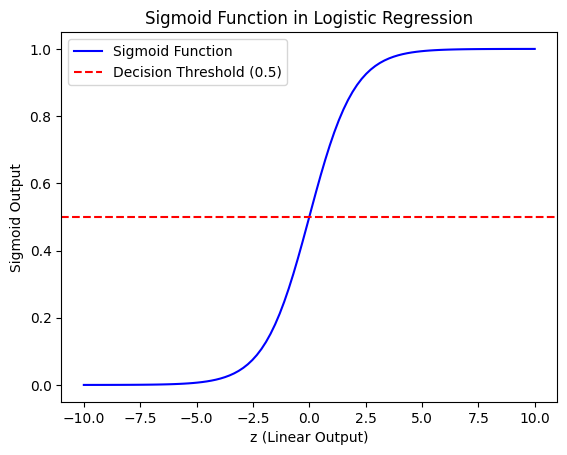

In [26]:
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
z = np.linspace(-10, 10, 100)
sigmoid_values = sigmoid(z)
plt.plot(z, sigmoid_values, label="Sigmoid Function", color="blue")
plt.axhline(y=0.5, color='red', linestyle='--', label="Decision Threshold (0.5)")
plt.xlabel("z (Linear Output)")
plt.ylabel("Sigmoid Output")
plt.title("Sigmoid Function in Logistic Regression")
plt.legend()
plt.show()



Converted target labels:
[0 1]


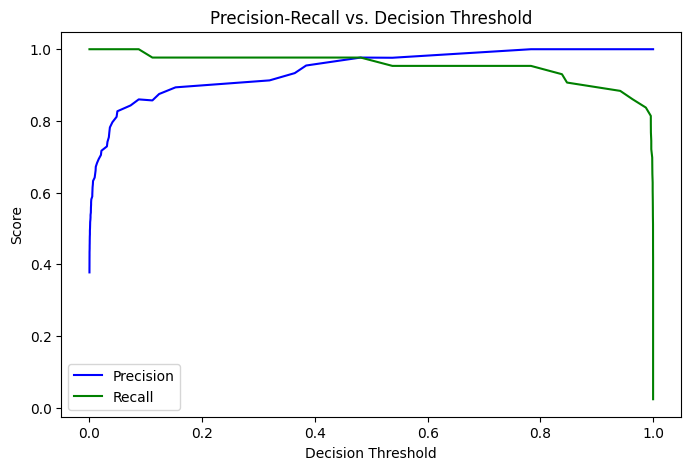

In [28]:
y_test_binary = y_test.map({'B': 0, 'M': 1})
print("\nConverted target labels:")
print(y_test_binary.unique())
precisions, recalls, thresholds = precision_recall_curve(y_test_binary, y_probs)
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(thresholds, precisions[:-1], label="Precision", color="blue")
plt.plot(thresholds, recalls[:-1], label="Recall", color="green")
plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs. Decision Threshold")
plt.legend()
plt.show()


In [29]:
optimal_threshold = 0.4
y_pred_adjusted = (y_probs >= optimal_threshold).astype(int)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
accuracy_adjusted = accuracy_score(y_test_binary, y_pred_adjusted)
conf_matrix_adjusted = confusion_matrix(y_test_binary, y_pred_adjusted)
classification_rep_adjusted = classification_report(y_test_binary, y_pred_adjusted)
roc_auc_adjusted = roc_auc_score(y_test_binary, y_probs)
print("\nOptimized Model Accuracy:", accuracy_adjusted)
print("\nUpdated Confusion Matrix:")
print(conf_matrix_adjusted)
print("\nUpdated Classification Report:")
print(classification_rep_adjusted)
print("\nUpdated ROC-AUC Score:", roc_auc_adjusted)



Optimized Model Accuracy: 0.9824561403508771

Updated Confusion Matrix:
[[70  1]
 [ 1 42]]

Updated Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Updated ROC-AUC Score: 0.99737962659679


In [30]:
import pickle
with open("logistic_model.pkl", "wb") as file:
    pickle.dump(model, file)
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)
print("\nModel and scaler saved successfully!")



Model and scaler saved successfully!


In [32]:
print("Expected features:", X_train_scaled.shape[1])
print("New input features:", new_data.shape[1])


Expected features: 31
New input features: 30


In [34]:
import pandas as pd
new_data_df = pd.DataFrame(new_data, columns=X.columns)  # Ensure feature names match original dataset
new_data_scaled = scaler_loaded.transform(new_data_df)
prediction = model_loaded.predict(new_data_scaled)
prediction_prob = model_loaded.predict_proba(new_data_scaled)
print("\nPredicted Class:", prediction[0])
print("Prediction Probability:", prediction_prob[0])



Predicted Class: B
Prediction Probability: [1. 0.]
